<a href="https://colab.research.google.com/github/intelligenxe/gym-anytrading-RL/blob/main/RL_Trading_Agent_4_0(inx).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installation of Libraries

In [2]:
!pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support

  Cloning https://github.com/DLR-RM/stable-baselines3 (to revision feat/gymnasium-support) to /tmp/pip-req-build-3l204qzb
  Running command git clone --filter=blob:none --quiet https://github.com/DLR-RM/stable-baselines3 /tmp/pip-req-build-3l204qzb
  Running command git checkout -q feat/gymnasium-support
  error: pathspec 'feat/gymnasium-support' did not match any file(s) known to git
  error: subprocess-exited-with-error
  
  × git checkout -q feat/gymnasium-support did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git checkout -q feat/gymnasium-support did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Cloning https://github.com/Stable-Baselines-Team/stable-baselines3-contrib (to revision feat/gymnasium-support) to /tmp/pip-req-build-

In [3]:
!pip install gym-anytrading

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.3 MB/s eta 0:00:00


In [4]:
!pip install shimmy>=0.2.1

In [5]:
!pip install finta

In [6]:
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.1 MB/s eta 0:00:00


## Importing RL libraries

In [7]:
# Gym stuff
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
from stable_baselines3.common.sb2_compat.rmsprop_tf_like import RMSpropTFLike


# Processing libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Stock Market Data

In [8]:
import yfinance as yf
import pandas as pd

In [9]:
df = yf.download('TQQQ', start='2019-01-01')       # insert stock ticker and start of the date range

[*********************100%%**********************]  1 of 1 completed


In [10]:
df = df.drop('Adj Close', axis=1)

In [11]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,8.6950,9.5575,8.6825,9.3925,135832800
2019-01-03,8.9950,9.1025,8.4075,8.4825,165255200
2019-01-04,8.8875,9.6900,8.7925,9.5675,136482000
2019-01-07,9.6175,10.0375,9.5325,9.8725,106553200
2019-01-08,10.1725,10.2775,9.7250,10.1575,105811200


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1329 entries, 2019-01-02 to 2024-04-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1329 non-null   float64
 1   High    1329 non-null   float64
 2   Low     1329 non-null   float64
 3   Close   1329 non-null   float64
 4   Volume  1329 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 62.3 KB


In [13]:
df['Volume'] = df['Volume'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1329 entries, 2019-01-02 to 2024-04-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1329 non-null   float64
 1   High    1329 non-null   float64
 2   Low     1329 non-null   float64
 3   Close   1329 non-null   float64
 4   Volume  1329 non-null   float64
dtypes: float64(5)
memory usage: 62.3 KB


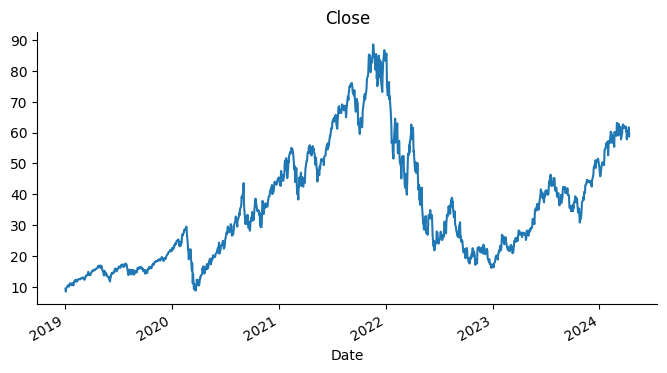

In [15]:
from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
from datetime import datetime

In [17]:
# inplace=True makes the changes in the original dataframe
df.reset_index(inplace=True)
# normalize() method converts times to midnight
df['Date'] = df['Date'].dt.normalize()
df.set_index('Date', inplace=True)
df.sort_values('Date', ascending=True, inplace=True)

In [18]:
data = df
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,8.6950,9.5575,8.6825,9.3925,135832800.0
2019-01-03,8.9950,9.1025,8.4075,8.4825,165255200.0
2019-01-04,8.8875,9.6900,8.7925,9.5675,136482000.0
2019-01-07,9.6175,10.0375,9.5325,9.8725,106553200.0
2019-01-08,10.1725,10.2775,9.7250,10.1575,105811200.0


## Add Custom Indicators

In [ ]:
data['return'] = np.log(data['Close'] / data['Close'].shift(1))

In [ ]:
from finta import TA

In [ ]:
#Create columns for technical indicators & add them to the dataframe
data['RSI'] = TA.RSI(data,16)
data['SMA'] = TA.SMA(data, 20)
data['SMA_L'] = TA.SMA(data, 41)
data['OBV'] = TA.OBV(data)
#data['VWAP'] = TA.VWAP(data)
data['EMA'] = TA.EMA(data)
data['ATR'] = TA.ATR(data)
data.fillna(0, inplace=True)

In [ ]:
#Add momentum, volatitlity, & distance to the data_frame
data['momentum'] = data['return'].rolling(5).mean().shift(1)
data['volatility'] = data['return'].rolling(20).std().shift(1)
data['distance'] = (data['Close'] - data['Close'].rolling(50).mean()).shift(1)

In [ ]:
#Perform a simple linear regression direction prediction
lags = 5

cols = []
for lag in range(1, lags + 1):
  col = f'lag_{lag}'
  data[col] = data['Close'].shift(lag)
  cols.append(col)

data.dropna(inplace=True)

reg = np.linalg.lstsq(data[cols], data['Close'], rcond=None)[0]
data['Prediction'] = np.dot(data[cols], reg)

In [ ]:
data.tail()

,Open,High,Low,Close,Volume,trade_count,vwap,return,RSI,SMA,...,ATR,momentum,volatility,distance,lag_1,lag_2,lag_3,lag_4,lag_5,Prediction
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-05-12 18:07:00+00:00,171.1100,171.27,171.0800,171.2518,78099.0,844.0,171.162938,0.000858,40.775203,171.348150,...,0.104014,-0.000064,0.000292,-0.478664,171.1050,171.2150,171.2500,171.2100,171.220,171.112899
2023-05-12 18:08:00+00:00,171.2600,171.27,171.1600,171.2250,68661.0,855.0,171.216529,-0.000157,39.521614,171.328075,...,0.106236,0.000037,0.000357,-0.326400,171.2518,171.1050,171.2150,171.2500,171.210,171.244059
2023-05-12 18:09:00+00:00,171.2150,171.25,171.2000,171.2275,41369.0,531.0,171.219199,0.000015,39.706059,171.307200,...,0.104093,0.000018,0.000356,-0.346500,171.2250,171.2518,171.1050,171.2150,171.250,171.224929
2023-05-12 18:10:00+00:00,171.2296,171.37,171.2296,171.3407,62886.0,715.0,171.302643,0.000661,47.447081,171.296235,...,0.106400,-0.000026,0.000354,-0.337150,171.2275,171.2250,171.2518,171.1050,171.215,171.228091
2023-05-12 18:11:00+00:00,171.3500,171.40,171.2850,171.3000,67999.0,744.0,171.338276,-0.000238,45.220508,171.283735,...,0.110321,0.000147,0.000383,-0.219464,171.3407,171.2275,171.2250,171.2518,171.105,171.331901


# RL Environment Setup

In [19]:
#Create a function to properly format data frame to be passed through environment
def signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Close'].to_numpy()[start:end]
    #signal_features = env.df.loc[:, ['Open','High','Low','Volume','return','trade_count','momentum','volatility','distance','RSI','OBV','SMA','SMA_L','vwap','EMA','ATR', 'Prediction']].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Open','High','Low','Volume']].to_numpy()[start:end]
    return prices, signal_features

In [20]:
#Replace default data process with custom function from above
class MyCustomEnv(StocksEnv):
    _process_data = signals

#Initialize an environment setting the window size and train data
window_size = 65
start_index = window_size
end_train_index = round(len(data)*0.80)
end_val_index = len(data)

env2 = MyCustomEnv(df=data, window_size=window_size, frame_bound=(start_index, end_train_index))

In [21]:
#Create a Dummy Vector of our environment
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

## Train Test

In [22]:
#initialize our model and train
policy_kwargs = dict(optimizer_class=RMSpropTFLike, optimizer_kwargs=dict(eps=1e-5))
actor_critic = A2C('MlpPolicy', env, policy_kwargs=policy_kwargs, verbose=1)
actor_critic.learn(total_timesteps=200000)

Streaming output truncated to the last 5000 lines.
|    value_loss         | 0.696    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 416      |
|    iterations         | 4400     |
|    time_elapsed       | 52       |
|    total_timesteps    | 22000    |
| train/                |          |
|    entropy_loss       | -0.62    |
|    explained_variance | -0.973   |
|    learning_rate      | 0.0007   |
|    n_updates          | 4399     |
|    policy_loss        | -0.00995 |
|    value_loss         | 0.0102   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 417      |
|    iterations         | 4500     |
|    time_elapsed       | 53       |
|    total_timesteps    | 22500    |
| train/                |          |
|    entropy_loss       | -0.687   |
|    explained_variance | -0.168   |
|    learning_rate      

# Testing the Model

In [31]:
#Create a new environment with validation data
env = MyCustomEnv(df=data, window_size=window_size, frame_bound=(end_train_index, end_val_index))
obs = env.reset()

In [32]:
while True:
    obs = obs[np.newaxis, ...]
    action, _states = actor_critic.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

TypeError: tuple indices must be integers or slices, not tuple

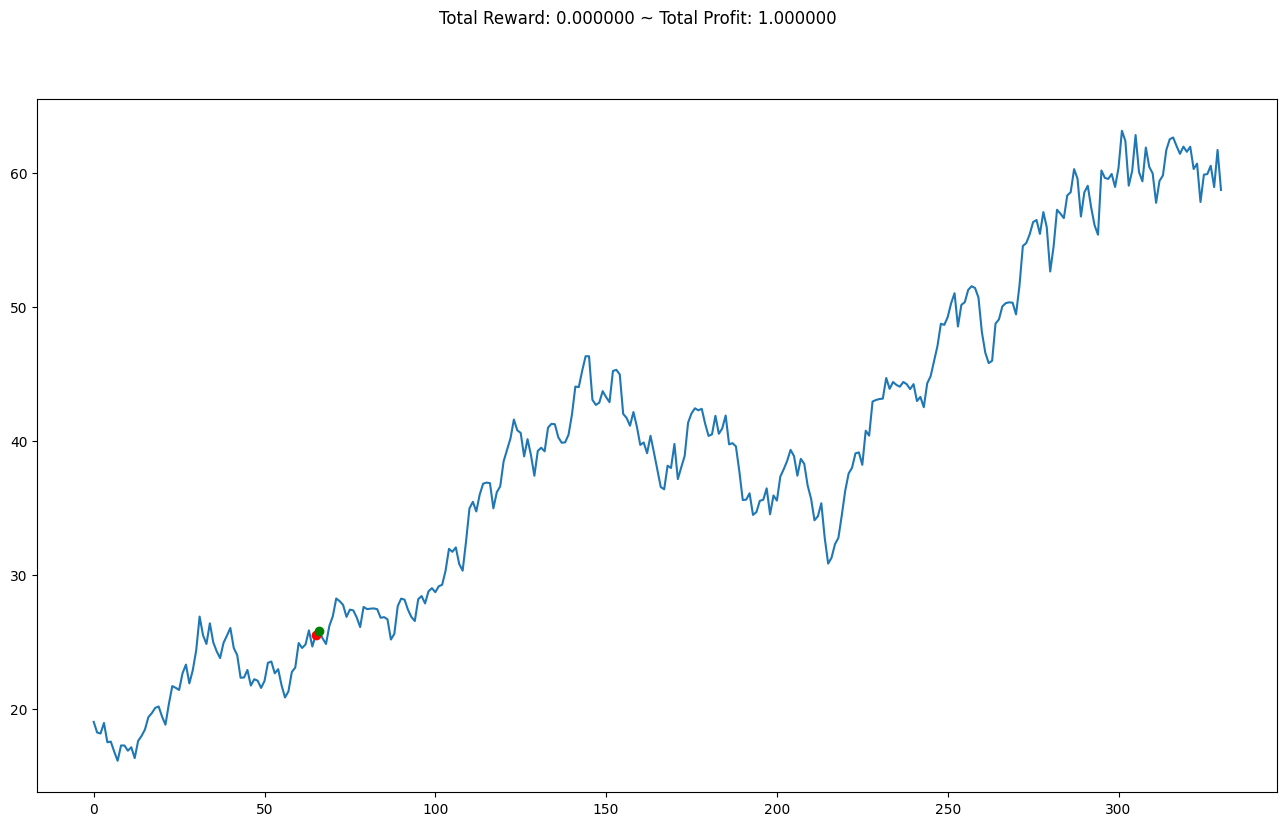

In [28]:
#Plot the results
plt.figure(figsize=(16,9))
env.render_all()
plt.show()

In [29]:
import quantstats as qs

In [30]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=data.index[end_train_index+1:end_val_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)

ValueError: Length of values (1) does not match length of index (265)